<a href="https://colab.research.google.com/github/changsksu/laser/blob/main/Laser_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#This notebook establish a multiple regression model based on the normalized values of E(x1), tp (x2), and fp (x3)

In [1]:
import math
import statistics
import numpy as np
import scipy.stats
from scipy import stats
from scipy.stats import f_oneway
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp as mc

# Example 1. Simple Regression (one Factor)

In [4]:
# the data file is in Github
# Montgomery 7ed Example 4.5.1
data = pd.read_csv('https://raw.githubusercontent.com/changsksu/laser/main/laser_exp2.csv', sep=',', na_values=".")

data

,x1,x2,x3,MSE,RA,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,0.91,1.03,-0.27,0.003610,37.94,NaN,NaN,NaN,NaN
1,0.91,-0.80,-0.28,0.006380,44.61,NaN,NaN,NaN,NaN
2,1.60,-0.60,-0.28,0.004470,49.86,NaN,NaN,NaN,NaN
3,0.22,1.03,-0.26,0.000750,46.43,NaN,NaN,NaN,NaN
4,-0.32,-0.90,-0.08,0.001070,42.06,NaN,NaN,NaN,NaN
5,-0.32,1.03,-0.08,0.001920,69.94,NaN,NaN,NaN,NaN
6,-0.19,-0.97,-0.24,0.000592,40.90,NaN,NaN,NaN,NaN
7,-0.19,1.03,-0.24,0.000550,32.18,NaN,NaN,NaN,NaN
8,0.14,1.03,-0.26,0.001110,29.20,NaN,NaN,NaN,NaN
9,-0.29,-0.80,-0.24,0.000473,41.08,NaN,NaN,NaN,NaN


In [5]:
#1st example: simple linear regression with one variable
#there is only variable or factor: hardwood conceptration;
#you can also use C(Conc) in the model statement to generate a more specific output
#response: strength

model = ols('RA ~ x1 + x2 + x3', data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     RA   R-squared:                       0.539
Model:                            OLS   Adj. R-squared:                  0.457
Method:                 Least Squares   F-statistic:                     6.619
Date:                Sun, 23 Jul 2023   Prob (F-statistic):            0.00366
Time:                        23:50:59   Log-Likelihood:                -75.765
No. Observations:                  21   AIC:                             159.5
Df Residuals:                      17   BIC:                             163.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.8788      2.165     18.421      0.0

The most significant factor is x3

# Analysis
The most significant factor is x3 since the p value is very small; both E and fp are not significant

eval_env: 1


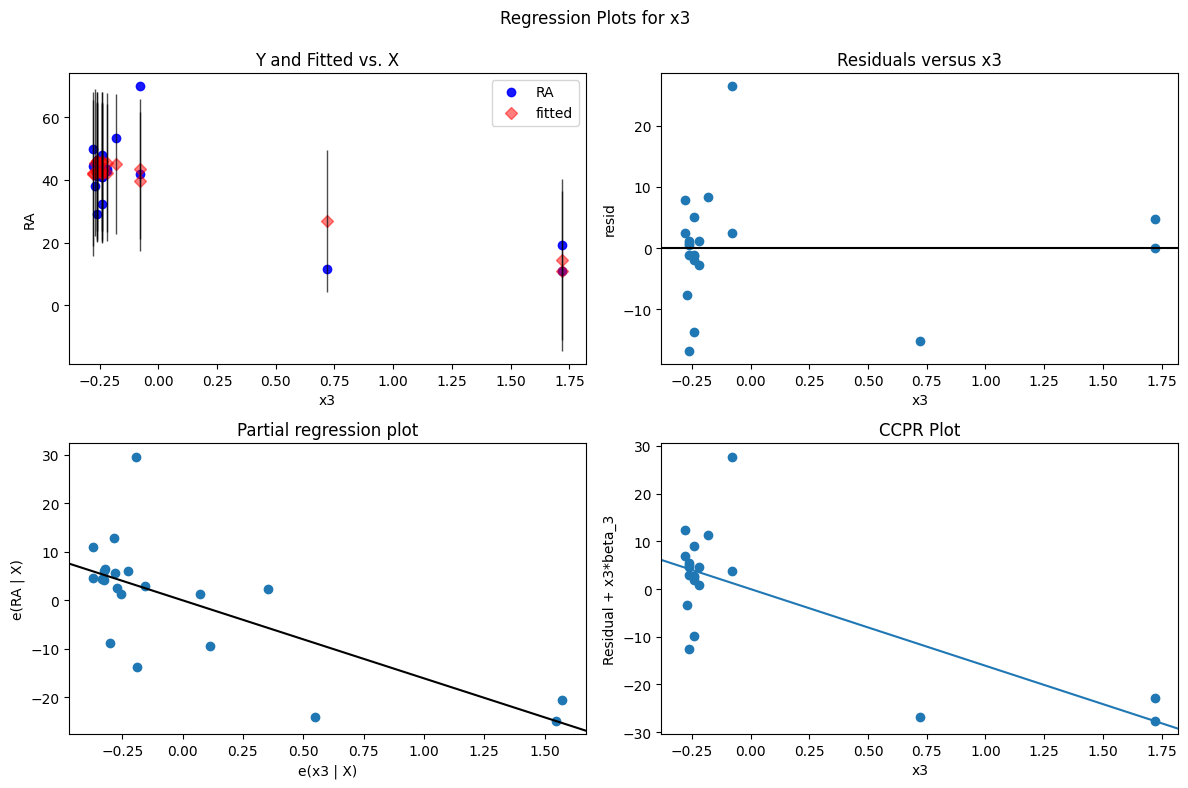

In [9]:
#Residual plot based on the first variable x1
#define figure size
fig = plt.figure(figsize=(12,8))

#produce regression plots
fig = sm.graphics.plot_regress_exog(model, 'x3', fig=fig)

eval_env: 1


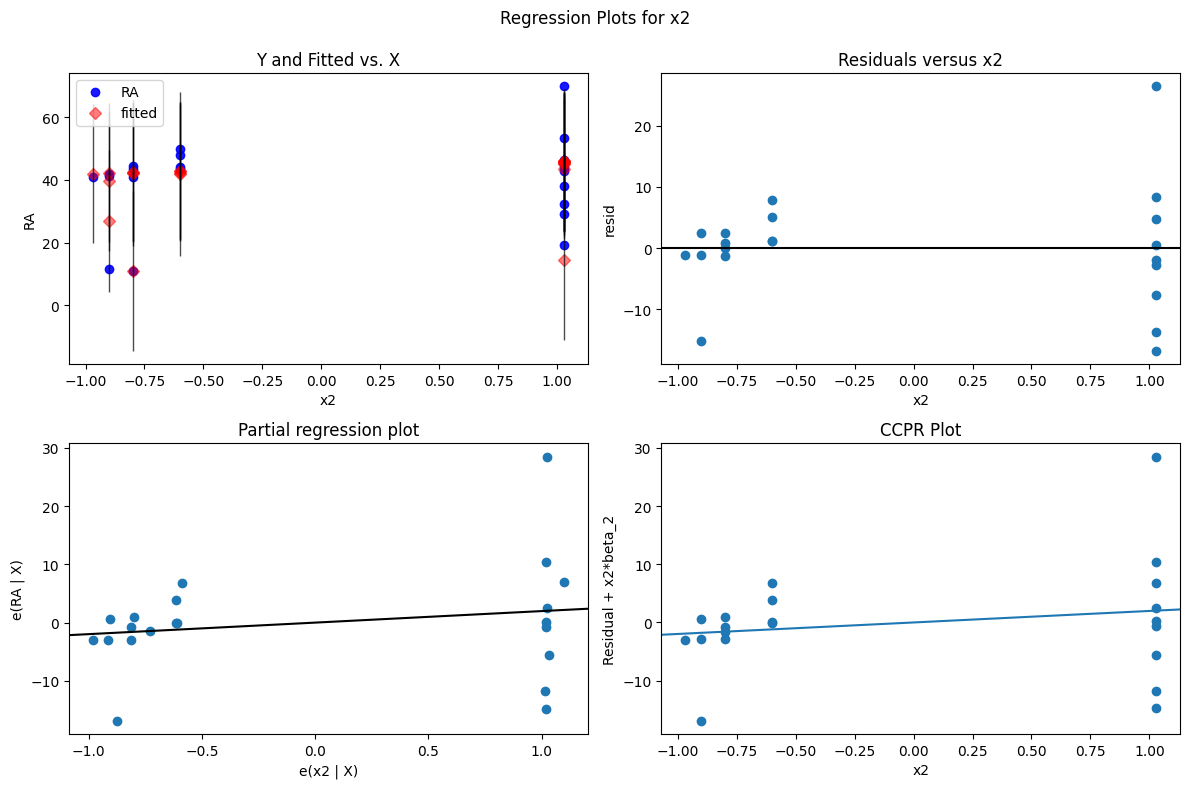

In [8]:
#Residual plot based on the second variable x2
#define figure size
fig = plt.figure(figsize=(12,8))

#produce regression plots
fig = sm.graphics.plot_regress_exog(model, 'x2', fig=fig)

Three tests should be performed based on residual analysis. 1. Normal Probabilty Plot for normality check 2. Residual vs x1 and residuals vs x2 plots for considant variance and 3. residual vs time order of data collection for independence. Note that the third check requires the knowledge of when each observation is collected. The above res vs x1 and x2 plots show constant variance

In [10]:
# obtain residuals

eij=model.resid

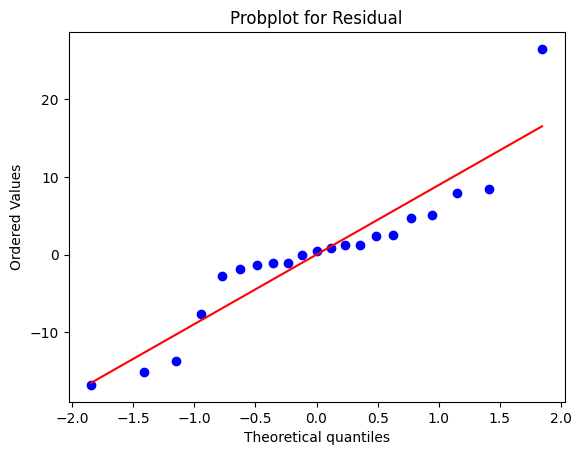

In [11]:
# probability plot for one variable
# stats.probplot use the default distribution normal prob if not specified

fig = plt.figure()
ax = fig.add_subplot(111)
res = stats.probplot(eij, plot=ax)
ax.set_title("Probplot for Residual")
plt.show()